<a href="https://colab.research.google.com/github/beingshivam/Python-projects/blob/master/IPL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import packages

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [0]:
#set styling for sns

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14,8)

In [0]:
#reading our dataset

data = pd.read_csv('matches.csv')


In [7]:
#shape of the dataset

data.shape

(636, 18)

In [0]:
#our data has 636 rows and 18 columns

In [9]:
#sample dataset values

data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
#dataset columns

data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [11]:
#dataset size
data.size

11448

In [12]:
#dataset variable details

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [13]:
#summary statistics of the dataset

data.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,636.000000,636.000000,629,636,636,636,636,636,636,636.000000,633,636.000000,636.000000,633,636,635,635,0.0
unique,NaN,NaN,30,450,14,14,14,2,3,NaN,14,NaN,NaN,201,35,44,45,NaN
top,NaN,NaN,Mumbai,2010-04-11,Mumbai Indians,Delhi Daredevils,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN
freq,NaN,NaN,85,2,82,84,85,363,626,NaN,92,NaN,NaN,18,66,73,54,NaN
mean,318.500000,2012.490566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025157,NaN,13.682390,3.372642,NaN,NaN,NaN,NaN,NaN
std,183.741666,2.773026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156726,NaN,23.908877,3.420338,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,159.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,318.500000,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,477.250000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,20.000000,7.000000,NaN,NaN,NaN,NaN,NaN


In [14]:
#how many matches ?

data.id.max()

636

In [15]:
#how many seasons ?

#ipl happens each year so we will be printing unique values
data.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [16]:
#or 
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [0]:
total_seasons = len(data['season'].unique())

In [18]:
total_seasons

10

In [19]:
#total seasons in the dataset

len(data['season'].unique())

10

In [20]:
#which team won by maximum runs?

data['win_by_runs'].max()

146

In [21]:
#returns all columns for the win_by_run max values
data.iloc[data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [22]:
#team which won by maximum runs?

data.iloc[data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [23]:
#which team won by minimum runs?

data.iloc[data[data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

#subsetting the data for min runs to be greater than or equal to 1

'Mumbai Indians'

In [24]:
#which team won by maximum wickets?

data.iloc[data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [25]:
#which team won by minimum wickets?

data.iloc[data[data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

#subsetting the data for min runs to be greater than or equal to 1

'Mumbai Indians'

In [0]:
#data visualization

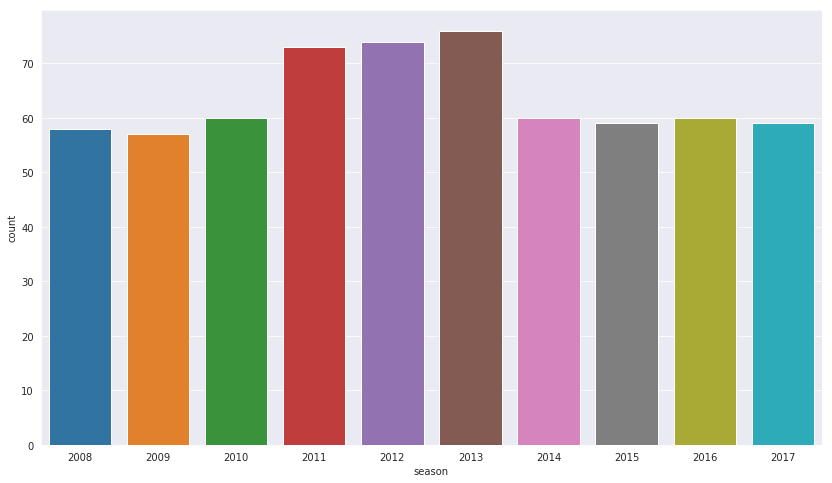

In [27]:
#which season had most number of matches?

import matplotlib.pyplot as plt

sns.countplot(x='season', data=data)
plt.savefig('number_of_matches1.png')
plt.show()



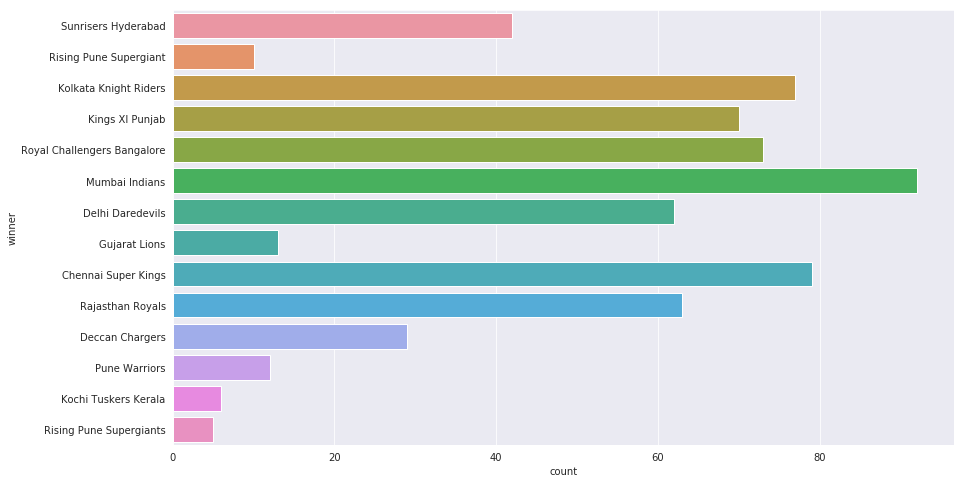

In [30]:
#which is the most successful IPL team?

sns.countplot(y='winner', data=data)
plt.savefig('Most_successful_ipl_team.png')

plt.show()

In [0]:
#top player of the match winner

top_players = data.player_of_match.value_counts()[:10]

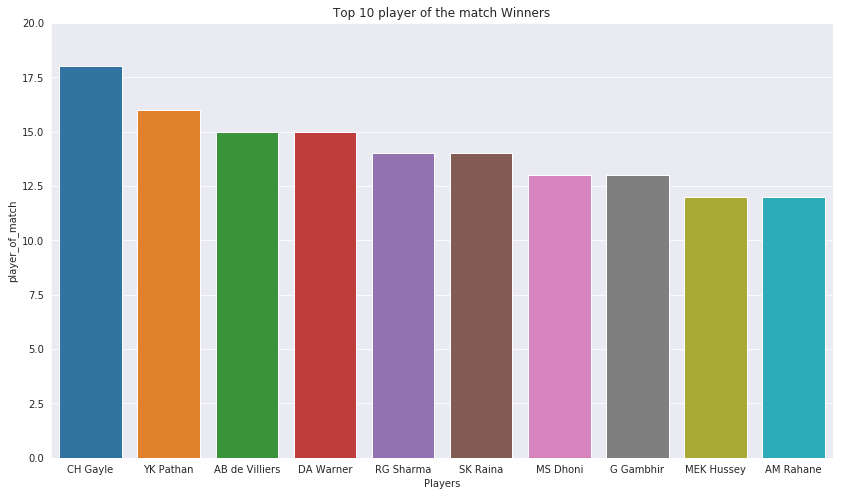

In [35]:
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_xlabel("Players")
ax.set_title("Top 10 player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.savefig('Top_player.png')
plt.show()

In [0]:
#Is winning the toss led to winning the match??

match_toss = data['toss_winner'] == data['winner']


In [39]:
match_toss.groupby(match_toss).size()

False    311
True     325
dtype: int64

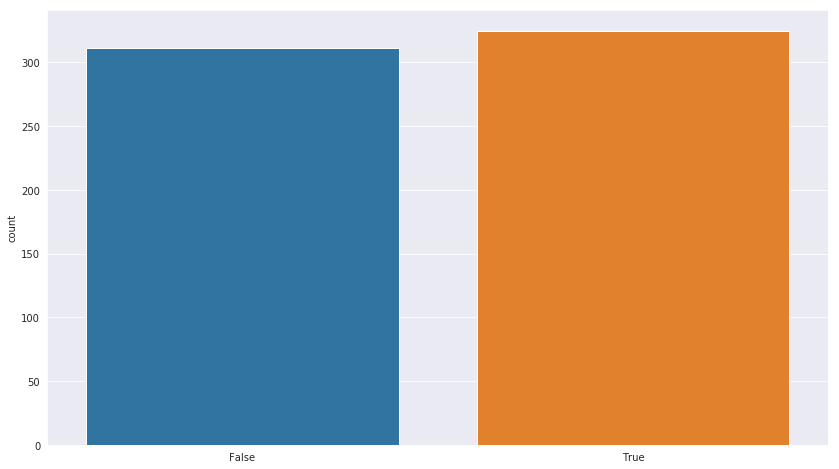

In [40]:
#hence match winning are toss winning are correlated

sns.countplot(match_toss)
plt.savefig('match_winning_toss_winning.png')
plt.show()